# Cardio Disease Prediction using Data Mining Techniques


## Importing essential libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

## Importing and understanding our dataset

###Reading the  dataset 

In [2]:
data = pd.read_csv("framingham.csv")

###Verifying it as a 'dataframe' object in pandas

In [3]:
type(data)

pandas.core.frame.DataFrame

### Shape of dataset

In [4]:
data.shape

(9375, 16)

In [5]:
#Displaying the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           9375 non-null   int64  
 1   age              9375 non-null   int64  
 2   education        9165 non-null   float64
 3   currentSmoker    9375 non-null   int64  
 4   cigsPerDay       9317 non-null   float64
 5   BPMeds           9260 non-null   float64
 6   prevalentStroke  9375 non-null   int64  
 7   prevalentHyp     9375 non-null   int64  
 8   diabetes         9375 non-null   int64  
 9   totChol          9275 non-null   float64
 10  sysBP            9375 non-null   float64
 11  diaBP            9375 non-null   float64
 12  BMI              9337 non-null   float64
 13  heartRate        9373 non-null   float64
 14  glucose          8597 non-null   float64
 15  TenYearCHD       9375 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 1.1 MB


In [6]:
data.drop(columns=['education'],inplace=True)

###Printing out a few columns

In [7]:
data.head(5)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
data.sample(5)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3919,1,57,0,0.0,0.0,0,1,0,155.0,143.0,96.0,31.01,63.0,88.0,0
6140,0,52,1,20.0,1.0,0,1,0,161.0,180.0,114.0,32.52,105.0,104.0,0
1081,0,59,0,0.0,0.0,0,1,0,273.0,145.0,90.0,23.94,78.0,82.0,0
5914,0,57,1,1.0,0.0,0,1,0,229.0,126.5,90.0,26.00,68.0,58.0,0
2516,0,41,0,0.0,0.0,0,0,0,197.0,113.0,70.0,23.78,65.0,90.0,0


In [9]:
data.tail(5)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9370,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
9371,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
9372,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
9373,1,60,0,0.0,0.0,0,0,0,252.0,128.0,82.0,21.18,75.0,70.0,1
9374,1,41,1,30.0,0.0,0,1,0,292.0,152.0,73.0,25.21,75.0,112.0,0


###Description

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           9375 non-null   int64  
 1   age              9375 non-null   int64  
 2   currentSmoker    9375 non-null   int64  
 3   cigsPerDay       9317 non-null   float64
 4   BPMeds           9260 non-null   float64
 5   prevalentStroke  9375 non-null   int64  
 6   prevalentHyp     9375 non-null   int64  
 7   diabetes         9375 non-null   int64  
 8   totChol          9275 non-null   float64
 9   sysBP            9375 non-null   float64
 10  diaBP            9375 non-null   float64
 11  BMI              9337 non-null   float64
 12  heartRate        9373 non-null   float64
 13  glucose          8597 non-null   float64
 14  TenYearCHD       9375 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 1.1 MB


In [11]:
data.describe()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,9375.000000,9375.000000,9375.000000,9317.000000,9260.000000,9375.000000,9375.000000,9375.000000,9275.000000,9375.000000,9375.000000,9337.000000,9373.000000,8597.000000,9375.000000
mean,0.463147,50.344213,0.486507,8.793388,0.026782,0.005333,0.336853,0.023253,237.553100,133.870240,83.356800,25.635308,75.284647,81.971967,0.229867
std,0.498667,8.753531,0.499845,11.989168,0.161454,0.072839,0.472659,0.150715,44.694121,22.591357,11.741098,4.005458,11.860597,22.997300,0.420769
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,118.000000,75.000000,22.900000,66.000000,72.000000,0.000000
50%,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.000000,25.290000,75.000000,78.000000,0.000000
75%,1.000000,58.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,146.500000,91.000000,27.960000,81.000000,86.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Missing Value Detection

In [12]:
data.isnull().any()

gender             False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [13]:
data.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          58
BPMeds             115
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol            100
sysBP                0
diaBP                0
BMI                 38
heartRate            2
glucose            778
TenYearCHD           0
dtype: int64

In [14]:
data.dropna(inplace = True)

In [15]:
data.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 9374
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8386 non-null   int64  
 1   age              8386 non-null   int64  
 2   currentSmoker    8386 non-null   int64  
 3   cigsPerDay       8386 non-null   float64
 4   BPMeds           8386 non-null   float64
 5   prevalentStroke  8386 non-null   int64  
 6   prevalentHyp     8386 non-null   int64  
 7   diabetes         8386 non-null   int64  
 8   totChol          8386 non-null   float64
 9   sysBP            8386 non-null   float64
 10  diaBP            8386 non-null   float64
 11  BMI              8386 non-null   float64
 12  heartRate        8386 non-null   float64
 13  glucose          8386 non-null   float64
 14  TenYearCHD       8386 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 1.0 MB


###converting datatypes for certain attributes

In [17]:
data['cigsPerDay'] = data['cigsPerDay'].astype(int)
data['BPMeds'] = data['BPMeds'].astype(int)
data['totChol'] = data['totChol'].astype(int)
data['sysBP'] = data['sysBP'].astype(int)
data['diaBP'] = data['diaBP'].astype(int)
data['heartRate'] = data['heartRate'].astype(int)
data['glucose'] = data['glucose'].astype(int)

###Column description

In [18]:
info = ["1: male, 0: female","age","0 = nonsmoker; 1 = smoker","number of cigarettes smoked per day (estimated average)","0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications","0 = Stroke not prevalent in family history; 1 = Stroke prevalent in family history","0 = Hypertension not prevalent in family history; 1 = Hypertension prevalent in family history","0 = No; 1 = Yes","total cholesterol (mg/dL)","systolic blood pressure (mmHg)","diastolic blood pressure (mmHg)","BodyMass Index calculated as: Weight (kg) / Height(meter-squared)","Beats/Min (Ventricular)","total glucose mg/dL","0 = Patient doesn’t have 10-year risk of future coronary heart disease; 1 = Patient has 10-year risk of future coronary heart disease"]


for i in range(len(info)):
    print(data.columns[i]+":\t"+info[i])

gender:	1: male, 0: female
age:	age
currentSmoker:	0 = nonsmoker; 1 = smoker
cigsPerDay:	number of cigarettes smoked per day (estimated average)
BPMeds:	0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
prevalentStroke:	0 = Stroke not prevalent in family history; 1 = Stroke prevalent in family history
prevalentHyp:	0 = Hypertension not prevalent in family history; 1 = Hypertension prevalent in family history
diabetes:	0 = No; 1 = Yes
totChol:	total cholesterol (mg/dL)
sysBP:	systolic blood pressure (mmHg)
diaBP:	diastolic blood pressure (mmHg)
BMI:	BodyMass Index calculated as: Weight (kg) / Height(meter-squared)
heartRate:	Beats/Min (Ventricular)
glucose:	total glucose mg/dL
TenYearCHD:	0 = Patient doesn’t have 10-year risk of future coronary heart disease; 1 = Patient has 10-year risk of future coronary heart disease


###Analysing the 'TenYearCHD' variable

In [19]:
data["TenYearCHD"].describe()

count    8386.000000
mean        0.239804
std         0.426989
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [20]:
data["TenYearCHD"].unique()

array([0, 1], dtype=int64)

## Data Visualization

### First, analysing the TenYearCHD variable:

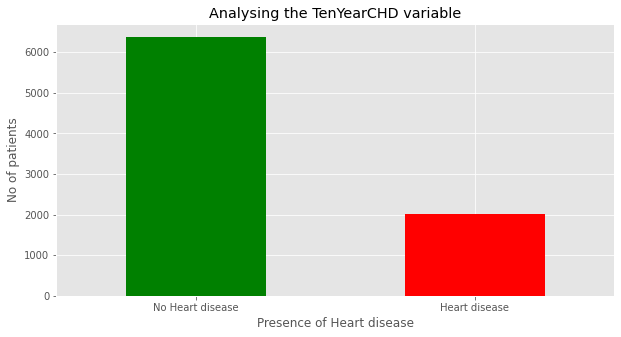

0    6375
1    2011
Name: TenYearCHD, dtype: int64


In [21]:
plt.figure(figsize=(10,5))
pd.value_counts(data['TenYearCHD']).sort_index().plot(kind='bar',color=['green','red'])
plt.title('Analysing the TenYearCHD variable')
plt.xlabel('Presence of Heart disease')
plt.ylabel('No of patients')
plt.xticks([0,1],['No Heart disease','Heart disease'],rotation=0)
plt.show()
target_temp = data.TenYearCHD.value_counts()

print(target_temp)

In [22]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/8200,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/8200,2)))

Percentage of patients without heart problems: 77.74
Percentage of patients with heart problems: 24.52


### Analysing the "gender" feature

In [23]:
data["gender"].unique()

array([1, 0], dtype=int64)

In [24]:
data_sex = data.groupby(["gender","TenYearCHD"]).size()
data_sex

gender  TenYearCHD
0       0             3665
        1              679
1       0             2710
        1             1332
dtype: int64

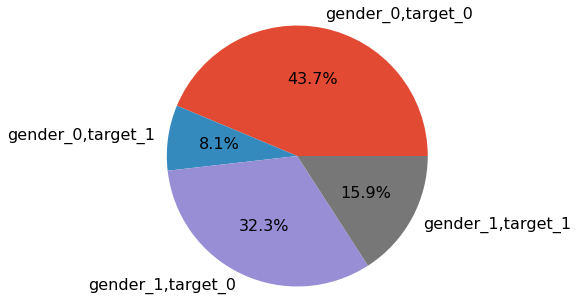

In [25]:
plt.pie(data_sex.values, labels = ["gender_0,target_0", "gender_0,target_1", "gender_1,target_0", "gender_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The ratio of male has heart disease is 16%, a little bit higher than female.

### Analysing the "age" feature

In [26]:
data["age"].describe()

count    8386.000000
mean       50.431314
std         8.773020
min        32.000000
25%        43.000000
50%        50.000000
75%        58.000000
max        70.000000
Name: age, dtype: float64

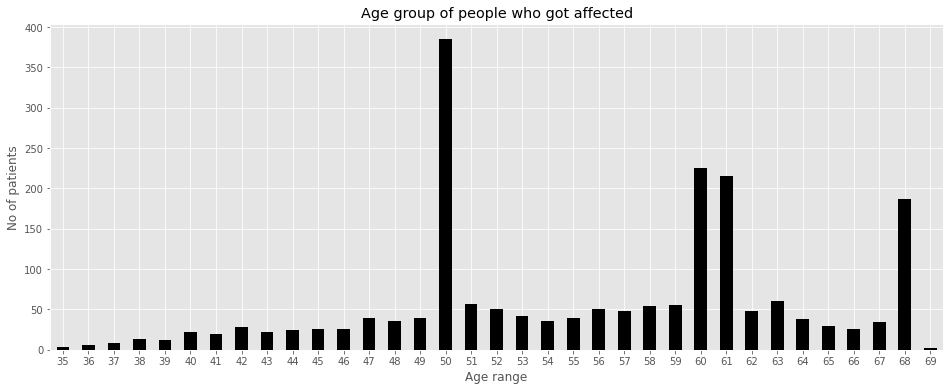

In [27]:
plt.figure(figsize=(16,6))
pd.value_counts(data['age'][data['TenYearCHD']==1]).sort_index().plot(kind='bar',color='black')
plt.title('Age group of people who got affected')
plt.xlabel('Age range')
plt.ylabel('No of patients')
plt.xticks(rotation=0)
plt.show()

The ratio get higher over the age of 50. That is, people who is over 50 is under high risk of heart disease.

### Analysing the "currentSmoker" feature

In [28]:
data["currentSmoker"].unique()

array([0, 1], dtype=int64)

In [29]:
data_currentSmoker = data.groupby(["currentSmoker","TenYearCHD"]).size()
data_currentSmoker

currentSmoker  TenYearCHD
0              0             3288
               1             1074
1              0             3087
               1              937
dtype: int64

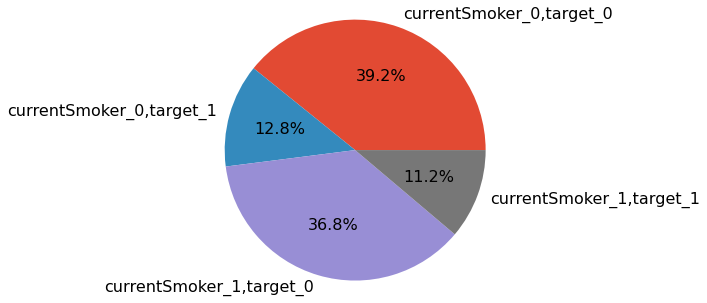

In [30]:
plt.pie(data_currentSmoker.values, labels = ["currentSmoker_0,target_0", "currentSmoker_0,target_1", "currentSmoker_1,target_0", "currentSmoker_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The ratio of smokers who has heart disease is 11%, a little bit lower than non-smokers.

### Analysing the "cigsPerDay" feature

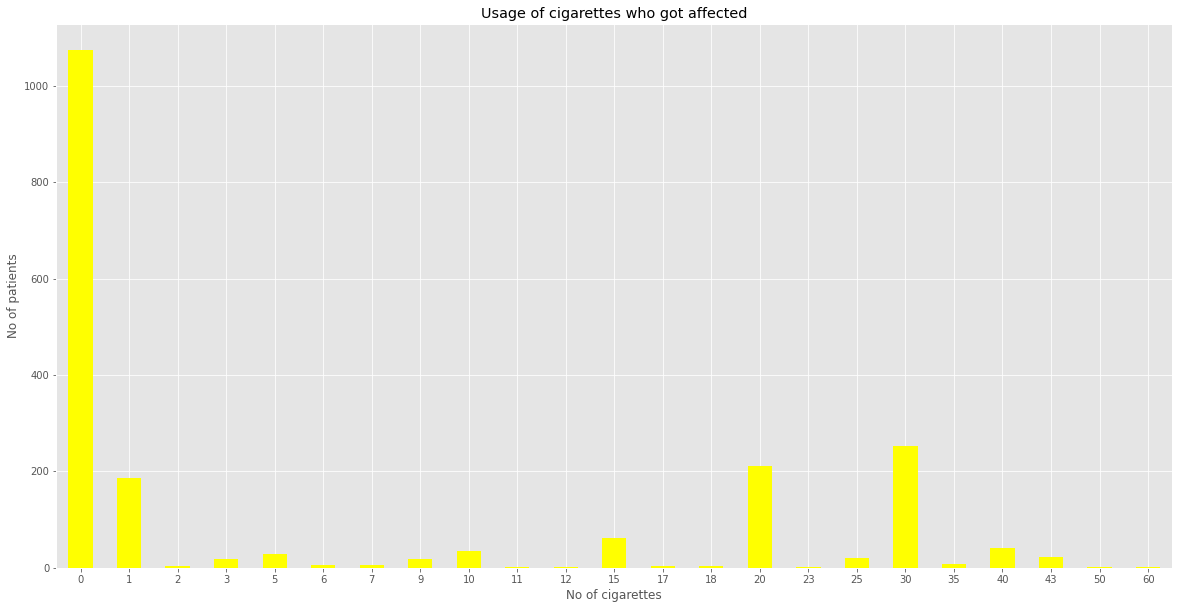

In [31]:
plt.figure(figsize=(20,10))
pd.value_counts(data['cigsPerDay'][data['TenYearCHD']==1]).sort_index().plot(kind='bar',color='yellow')
plt.title('Usage of cigarettes who got affected')
plt.xlabel('No of cigarettes')
plt.ylabel('No of patients')
plt.xticks(rotation=0)
plt.show()

We notice, that more number of cigarettes taken by people have the risk of having heart problems

### Analysing the "BPMeds" feature

In [32]:
data["BPMeds"].unique()

array([0, 1])

In [33]:
data_bp = data.groupby(["BPMeds","TenYearCHD"]).size()
data_bp

BPMeds  TenYearCHD
0       0             6221
        1             1937
1       0              154
        1               74
dtype: int64

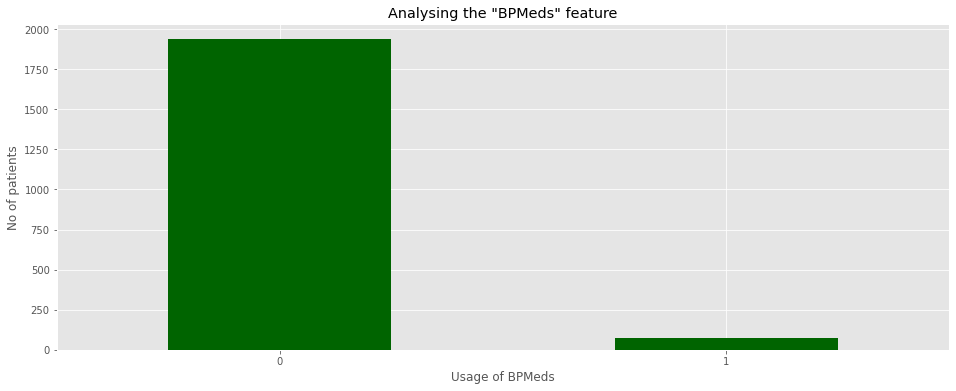

In [34]:
plt.figure(figsize=(16,6))
pd.value_counts(data['BPMeds'][data['TenYearCHD']==1]).sort_index().plot(kind='bar',color='darkgreen')
plt.title('Analysing the "BPMeds" feature')
plt.xlabel('Usage of BPMeds')
plt.ylabel('No of patients')
plt.xticks(rotation=0)
plt.show()

We realize that the usage of 'BPMEDS' are much less likely to have a heart disease.

### Analysing the "prevalentStroke" feature

In [35]:
data["prevalentStroke"].unique()

array([0, 1], dtype=int64)

In [36]:
data_stroke = data.groupby(["prevalentStroke","TenYearCHD"]).size()
data_stroke

prevalentStroke  TenYearCHD
0                0             6349
                 1             1995
1                0               26
                 1               16
dtype: int64

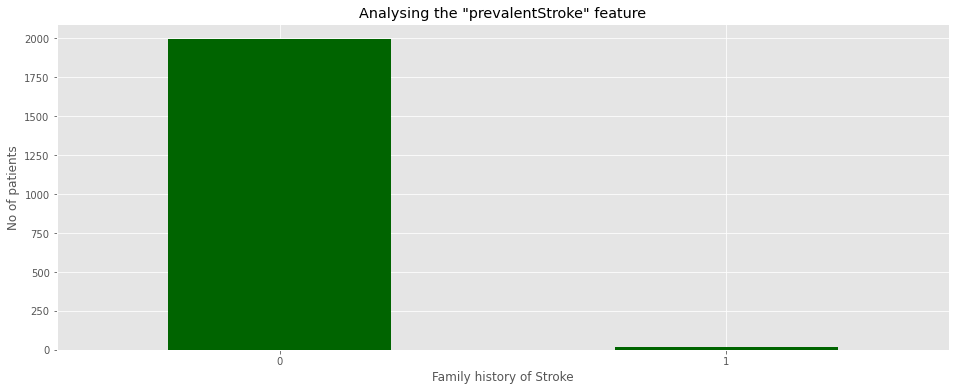

In [37]:
plt.figure(figsize=(16,6))
pd.value_counts(data['prevalentStroke'][data['TenYearCHD']==1]).sort_index().plot(kind='bar',color='darkgreen')
plt.title('Analysing the "prevalentStroke" feature')
plt.xlabel('Family history of Stroke')
plt.ylabel('No of patients')
plt.xticks(rotation=0)
plt.show()

We realize that people with ' No Stroke prevalent in family history' are much less likely to have a heart disease.

### Analysing the "prevalentHyp" feature

In [38]:
data["prevalentHyp"].unique()

array([0, 1], dtype=int64)

In [39]:
data_hyp = data.groupby(["prevalentHyp","TenYearCHD"]).size()
data_hyp

prevalentHyp  TenYearCHD
0             0             4613
              1              909
1             0             1762
              1             1102
dtype: int64

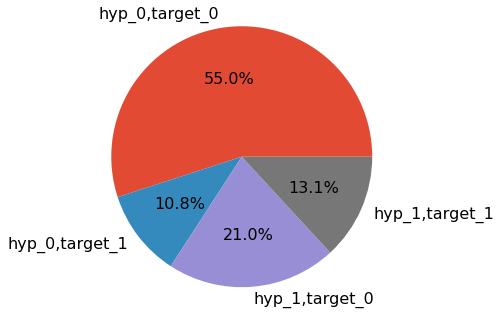

In [40]:
plt.pie(data_hyp.values, labels = ["hyp_0,target_0", "hyp_0,target_1", "hyp_1,target_0", "hyp_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

We notice that people with 'Hypertension in family history' are much more likely to have a heart disease.

### Analysing the "diabetes" feature

In [41]:
data["diabetes"].unique()

array([0, 1], dtype=int64)

In [42]:
data_diabetes = data.groupby(["diabetes","TenYearCHD"]).size()
data_diabetes

diabetes  TenYearCHD
0         0             6243
          1             1939
1         0              132
          1               72
dtype: int64

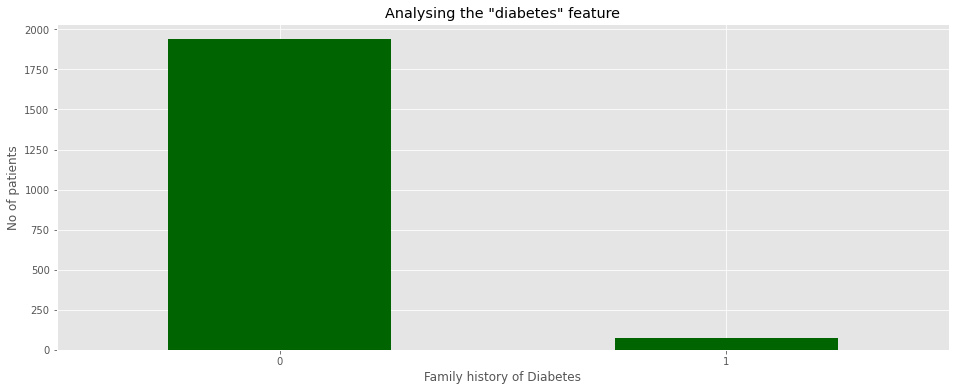

In [43]:
plt.figure(figsize=(16,6))
pd.value_counts(data['diabetes'][data['TenYearCHD']==1]).sort_index().plot(kind='bar',color='darkgreen')
plt.title('Analysing the "diabetes" feature')
plt.xlabel('Family history of Diabetes')
plt.ylabel('No of patients')
plt.xticks(rotation=0)
plt.show()

We notice that people with 'no diabetes history' are much less likely to have a heart disease.

### Analysing the "totChol" feature

<AxesSubplot:title={'center':'Analysing the "totChol" feature'}, xlabel='totChol', ylabel='Density'>

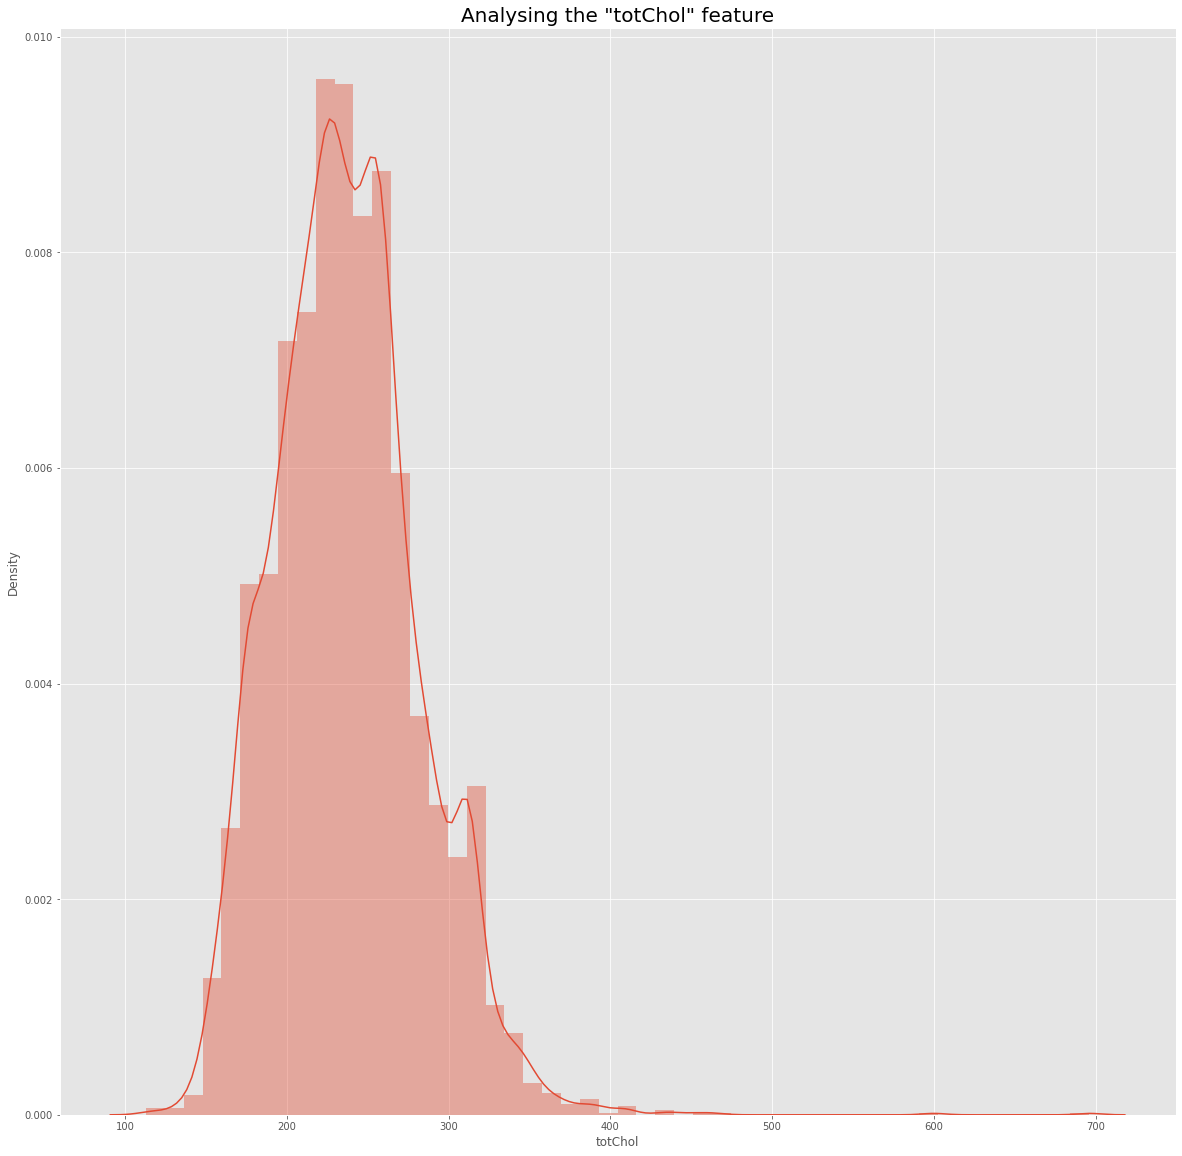

In [44]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "totChol" feature',fontsize = 20)
sns.distplot(data["totChol"])

The amount of people having heart disease are over 200mg/dl of total cholestrol. According to the research, the normal value of total cholestrol should be lower than 200mg/dl.

### Analysing the "sysBP" feature

<AxesSubplot:title={'center':'Analysing the "sysBP" feature'}, xlabel='sysBP', ylabel='Density'>

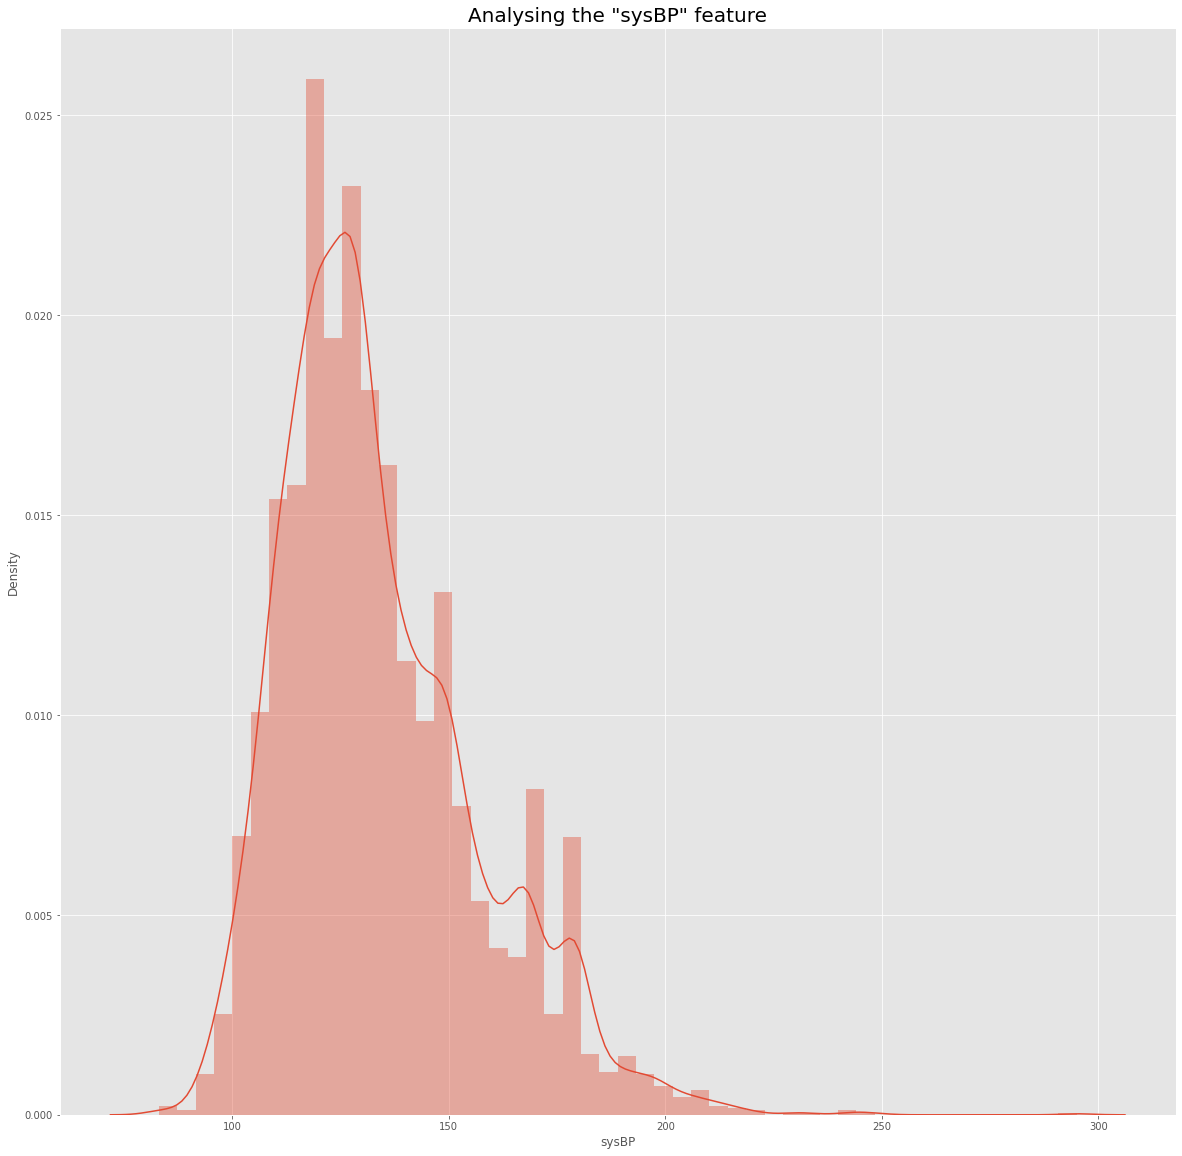

In [45]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "sysBP" feature',fontsize = 20)
sns.distplot(data["sysBP"])

The amount of people having heart disease are over 180 mm Hg of systolic blood pressure. According to the research, the normal value of systolic blood pressure should be lower than  120 mm Hg.

### Analysing the "diaBP" feature

<AxesSubplot:title={'center':'Analysing the "diaBP" feature'}, xlabel='diaBP', ylabel='Density'>

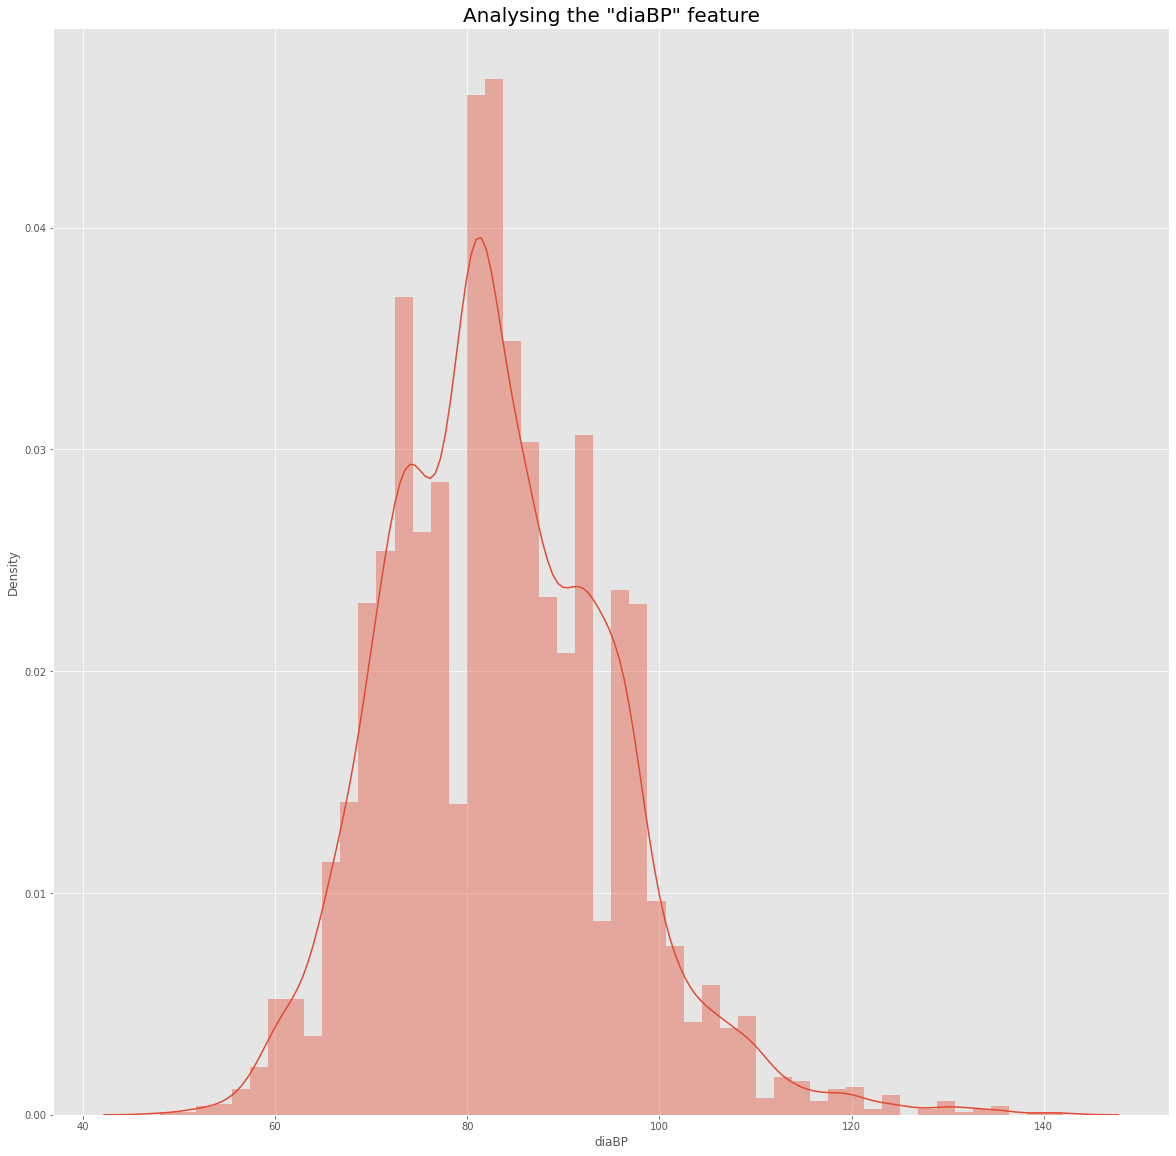

In [46]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "diaBP" feature',fontsize = 20)
sns.distplot(data["diaBP"])

The amount of people having heart disease are over 120 mm Hg of diastolic blood pressure. According to the research, the normal value of diastolic blood pressure should be lower than 80 mm Hg.

### Analysing the "BMI" feature

In [47]:
data["BMI"].describe()

count    8386.000000
mean       25.628902
std         3.983532
min        15.540000
25%        22.900000
50%        25.290000
75%        27.977500
max        56.800000
Name: BMI, dtype: float64

<AxesSubplot:title={'center':'Analysing the "BMI" feature'}, xlabel='BMI', ylabel='Density'>

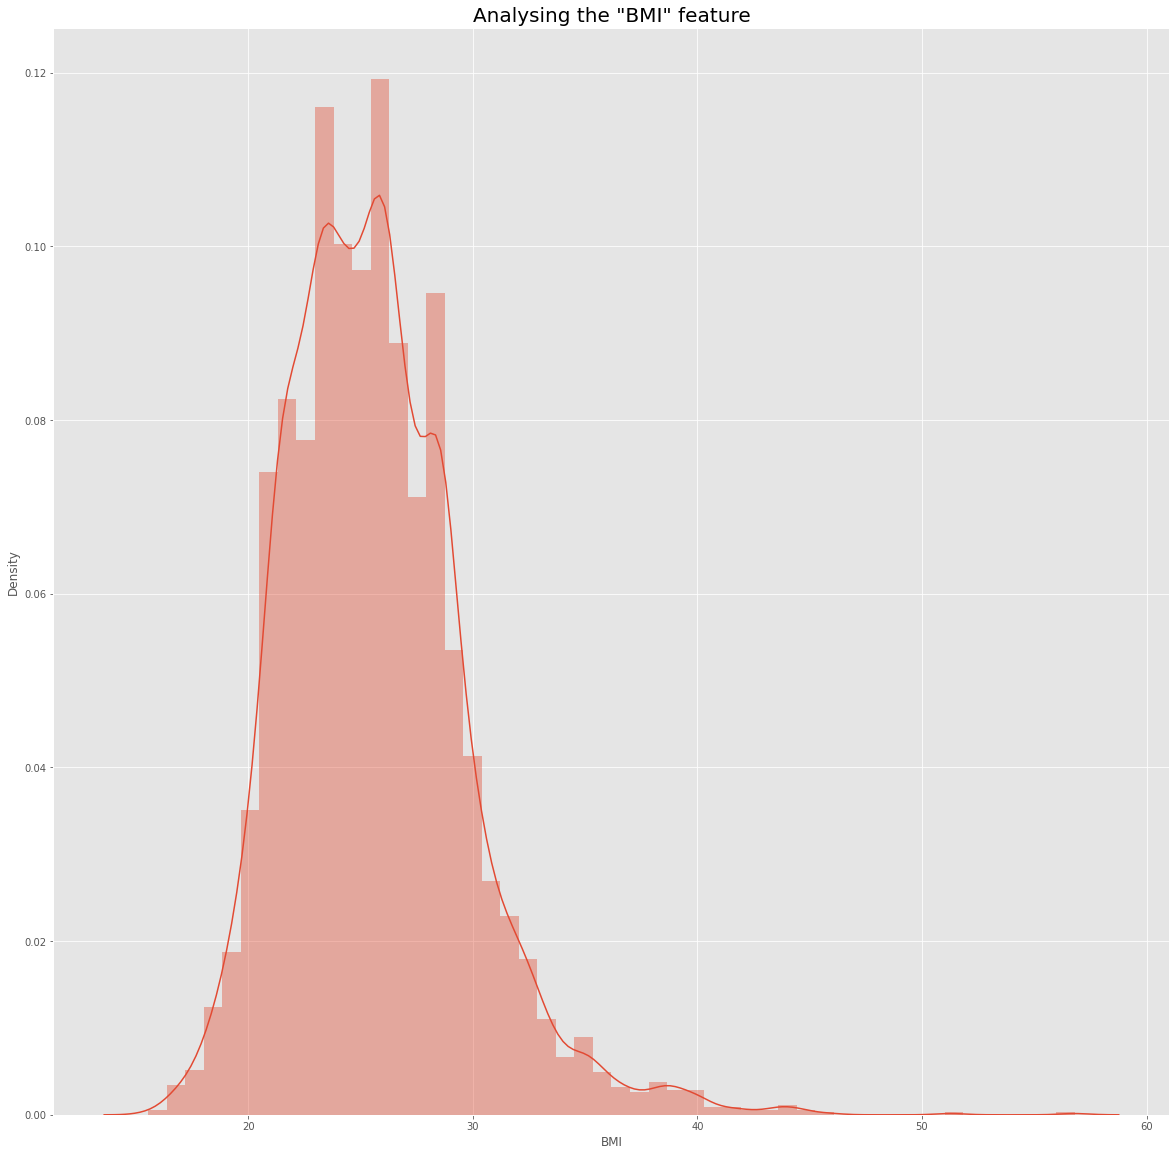

In [48]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "BMI" feature',fontsize = 20)
sns.distplot(data["BMI"])

We realize that people with 'BMI range - 30' are much more likely to have a heart disease.

### Analysing the "heartRate" feature

<AxesSubplot:title={'center':'Analysing the "heartRate" feature'}, xlabel='heartRate', ylabel='Density'>

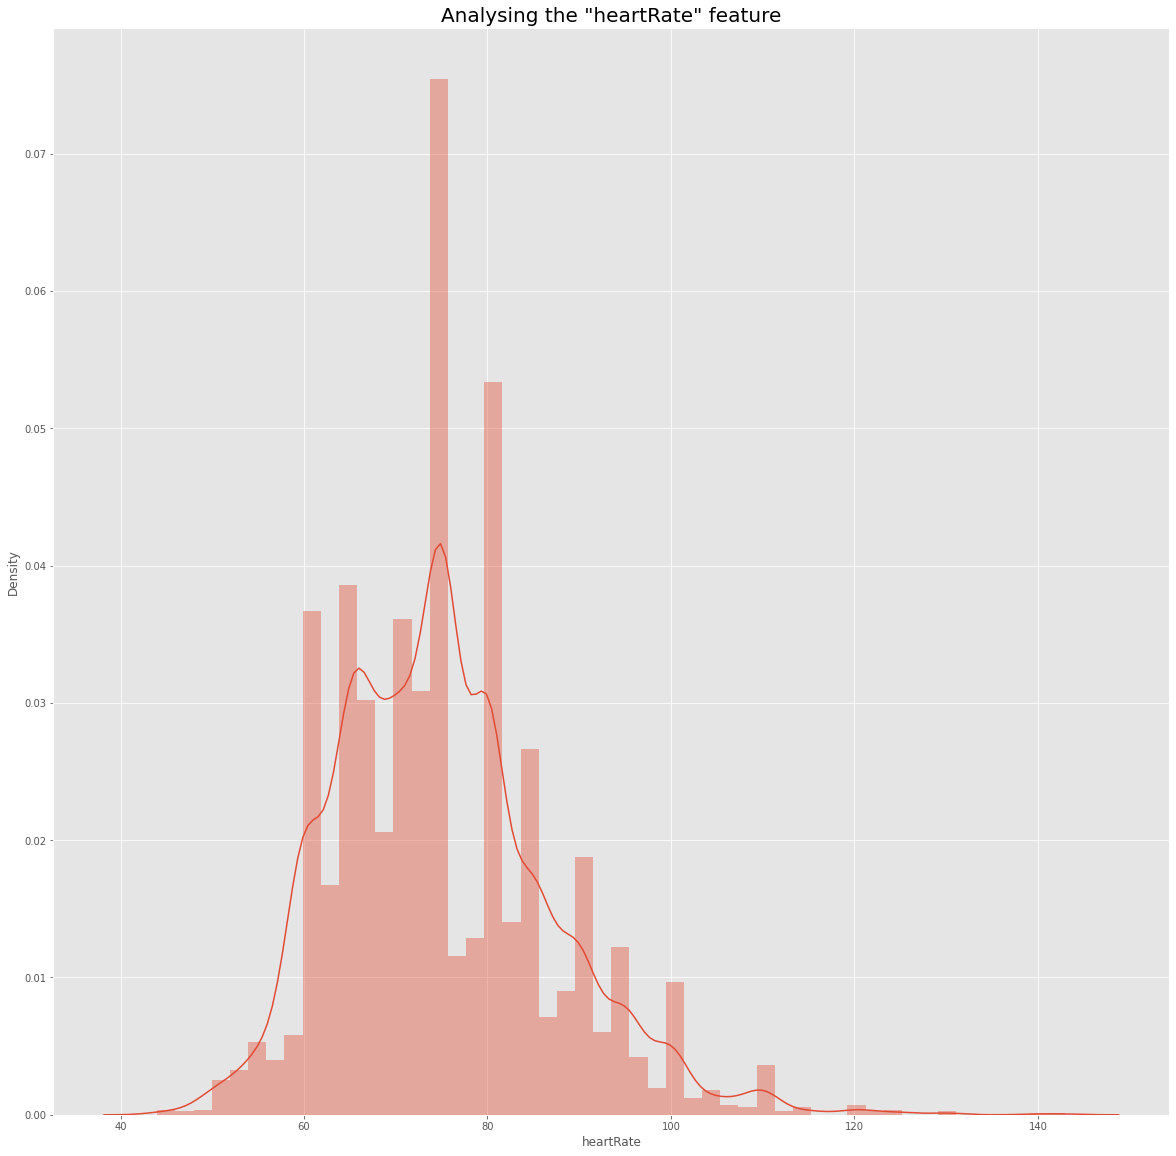

In [49]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "heartRate" feature',fontsize = 20)
sns.distplot(data["heartRate"])

We realize that people with  greater than 72 bpm are much more likely to have a heart disease.

### Analysing the "glucose" feature

In [50]:
data["glucose"].describe()

count    8386.000000
mean       81.893036
std        22.918546
min        40.000000
25%        72.000000
50%        78.000000
75%        86.000000
max       394.000000
Name: glucose, dtype: float64

<AxesSubplot:title={'center':'Analysing the "glucose" feature'}, xlabel='glucose', ylabel='Density'>

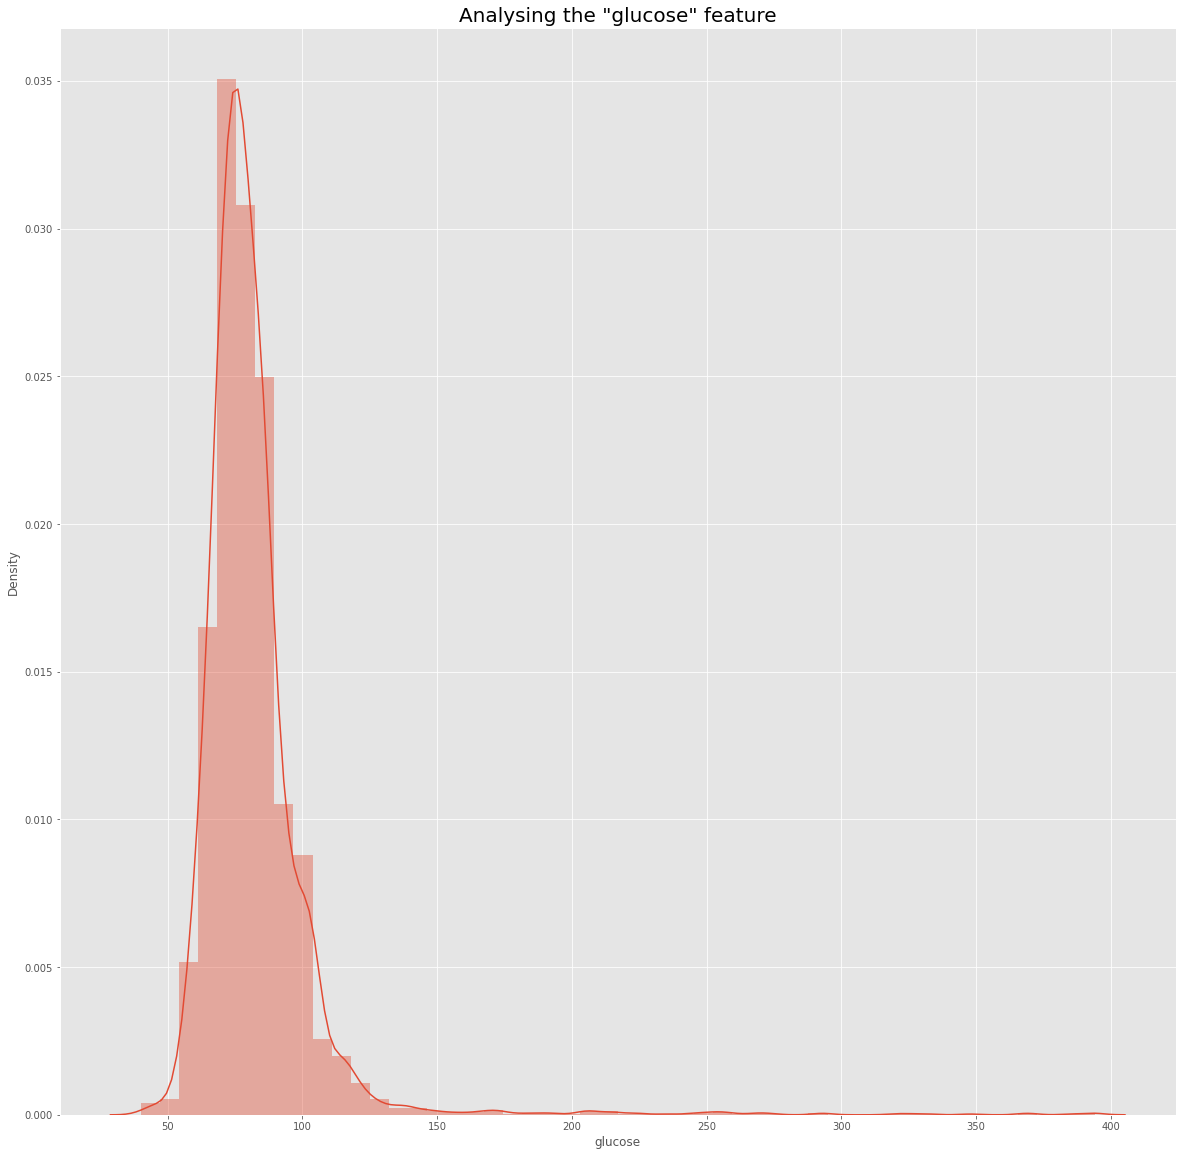

In [51]:
plt.figure(figsize=(20,20))
plt.title('Analysing the "glucose" feature',fontsize = 20)
sns.distplot(data["glucose"])

The amount of people having heart disease are over 110 mg/dL of glucose. According to the research, the normal value of glucose should be 90-110 mg/dL.

## Data Preprocessing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. 

In [52]:
from sklearn import preprocessing
scaled_features = data.copy()

In [53]:
scaled_features.columns

Index(['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [54]:
col_names = ['age', 'currentSmoker', 'cigsPerDay','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
label_names = ['gender']
features = scaled_features[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.get_dummies(scaled_features, columns=label_names)
scaled_features[col_names] = features

In [55]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 9374
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              8386 non-null   float64
 1   currentSmoker    8386 non-null   float64
 2   cigsPerDay       8386 non-null   float64
 3   BPMeds           8386 non-null   int32  
 4   prevalentStroke  8386 non-null   float64
 5   prevalentHyp     8386 non-null   float64
 6   diabetes         8386 non-null   float64
 7   totChol          8386 non-null   float64
 8   sysBP            8386 non-null   float64
 9   diaBP            8386 non-null   float64
 10  BMI              8386 non-null   float64
 11  heartRate        8386 non-null   float64
 12  glucose          8386 non-null   float64
 13  TenYearCHD       8386 non-null   float64
 14  gender_0         8386 non-null   uint8  
 15  gender_1         8386 non-null   uint8  
dtypes: float64(13), int32(1), uint8(2)
memory usage: 966.4 KB


In [56]:
data = scaled_features

In [57]:
data.rename(columns={'gender_0':'Female','gender_1':'Male'},inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 9374
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              8386 non-null   float64
 1   currentSmoker    8386 non-null   float64
 2   cigsPerDay       8386 non-null   float64
 3   BPMeds           8386 non-null   int32  
 4   prevalentStroke  8386 non-null   float64
 5   prevalentHyp     8386 non-null   float64
 6   diabetes         8386 non-null   float64
 7   totChol          8386 non-null   float64
 8   sysBP            8386 non-null   float64
 9   diaBP            8386 non-null   float64
 10  BMI              8386 non-null   float64
 11  heartRate        8386 non-null   float64
 12  glucose          8386 non-null   float64
 13  TenYearCHD       8386 non-null   float64
 14  Female           8386 non-null   uint8  
 15  Male             8386 non-null   uint8  
dtypes: float64(13), int32(1), uint8(2)
memory usage: 966.4 KB


## Feature Importance

### Checking correlation between columns

In [59]:
print(data.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD         1.000000
age                0.342139
sysBP              0.296456
prevalentHyp       0.244530
Female             0.202734
Male               0.202734
diaBP              0.197091
totChol            0.100210
glucose            0.098703
heartRate          0.083541
diabetes           0.041841
BPMeds             0.033186
prevalentStroke    0.023454
currentSmoker      0.015638
BMI                0.010643
cigsPerDay         0.001329
Name: TenYearCHD, dtype: float64


<AxesSubplot:>

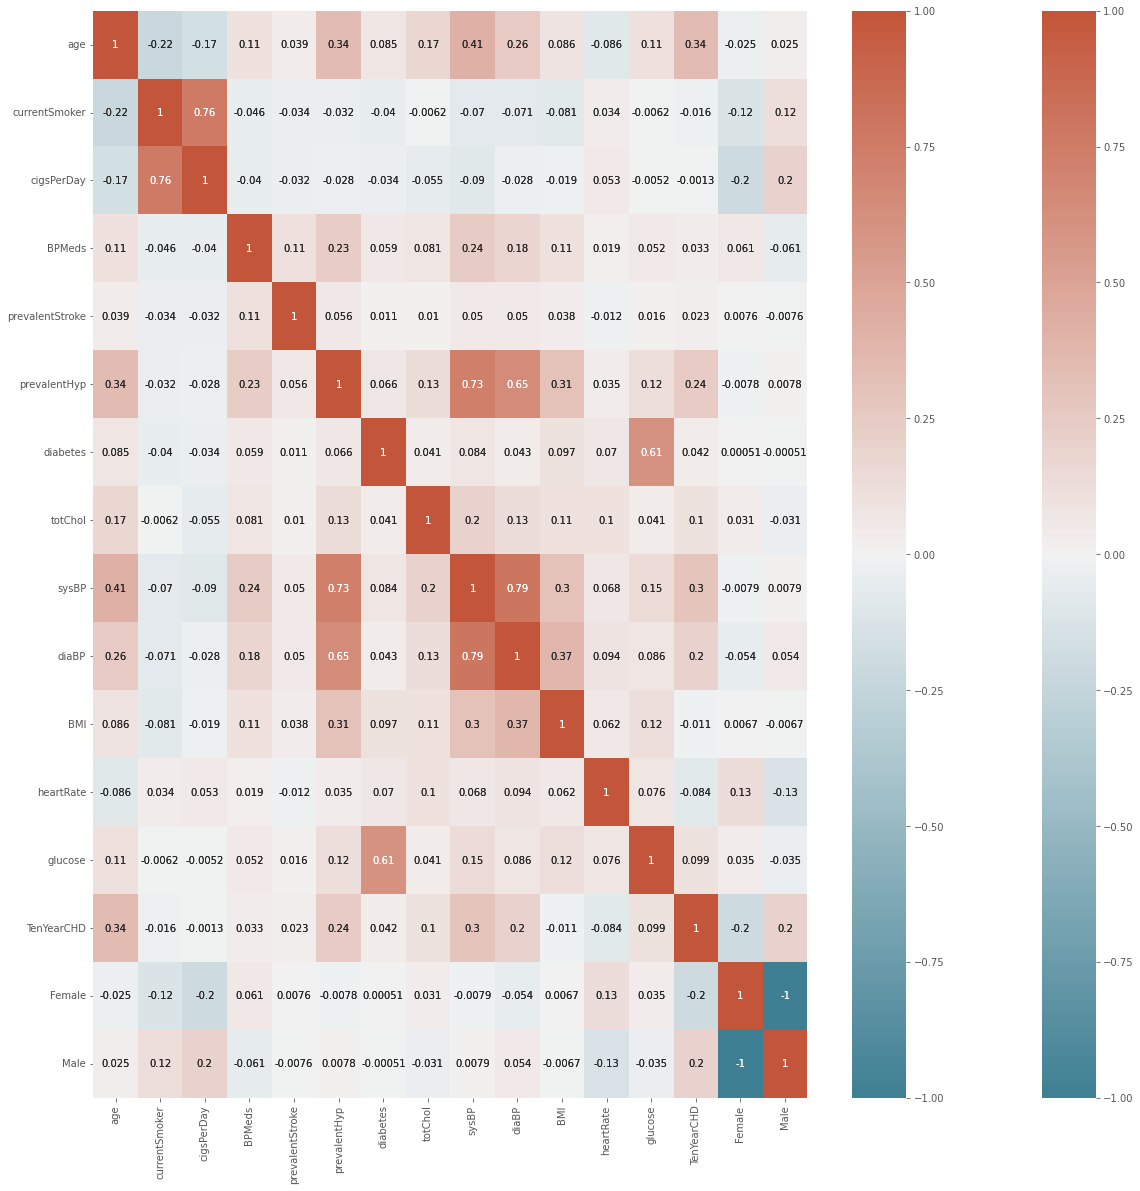

In [60]:
corr = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

A positive correlation between SysBP(Systolic Blood Pressure) & TenYearCHD (our predictor) and it says that  the greater amount of systolic blood pressure results in a greater chance of having heart disease.

In [61]:
data.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'Female', 'Male'],
      dtype='object')

### Data Splitting

In [62]:
X = data[['age','currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose','Female', 'Male']]


In [63]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 9374
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              8386 non-null   float64
 1   currentSmoker    8386 non-null   float64
 2   cigsPerDay       8386 non-null   float64
 3   BPMeds           8386 non-null   int32  
 4   prevalentStroke  8386 non-null   float64
 5   prevalentHyp     8386 non-null   float64
 6   diabetes         8386 non-null   float64
 7   totChol          8386 non-null   float64
 8   sysBP            8386 non-null   float64
 9   diaBP            8386 non-null   float64
 10  BMI              8386 non-null   float64
 11  heartRate        8386 non-null   float64
 12  glucose          8386 non-null   float64
 13  Female           8386 non-null   uint8  
 14  Male             8386 non-null   uint8  
dtypes: float64(12), int32(1), uint8(2)
memory usage: 900.8 KB


(8386, 15)

In [64]:
y = data['TenYearCHD']
y.shape

(8386,)

In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [67]:
X_train.shape

(6708, 15)

In [68]:
X_test.shape

(1678, 15)

In [69]:
y_train.shape

(6708,)

In [70]:
y_test.shape

(1678,)

In [71]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
testing_scores_encoded = lab_enc.fit_transform(y_test)

## Model Training And Evaluation

### Function for classification report

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 1. Logistic regression

#### Model training

In [73]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0,max_iter = 100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling = 1, l1_ratio=None)
LR.fit(X_train,training_scores_encoded)

y_pred_lr = LR.predict(X_test)

#### Classification Report

In [74]:
print_score(LR, X_train,training_scores_encoded , X_test, testing_scores_encoded, train=True)
print_score(LR, X_train,training_scores_encoded , X_test, testing_scores_encoded, train=False)

Train Result:
Accuracy Score: 78.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.811442     0.620000  0.788611     0.715721      0.765494
recall        0.940369     0.308075  0.788611     0.624222      0.788611
f1-score      0.871161     0.411618  0.788611     0.641390      0.760865
support    5098.000000  1610.000000  0.788611  6708.000000   6708.000000
_______________________________________________
Confusion Matrix: 
 [[4794  304]
 [1114  496]]

Test Result:
Accuracy Score: 78.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.813571    0.589041  0.784267     0.701306      0.759914
recall        0.929522    0.321696  0.784267     0.625609      0.784267
f1-score      0.867690    0.416129  0.784267     0.641910      0.759778
support    1277.000000  401.000000  

#### Accuracy

In [75]:
p1 = round(accuracy_score(y_pred_lr,testing_scores_encoded)*100,2)
print("Predicted accuracy using Logistic Regression model : ",p1,"%")

Predicted accuracy using Logistic Regression model :  78.43 %


#### Confusion Matrix

In [76]:
actual = testing_scores_encoded 
predicted = LR.predict(X_test)

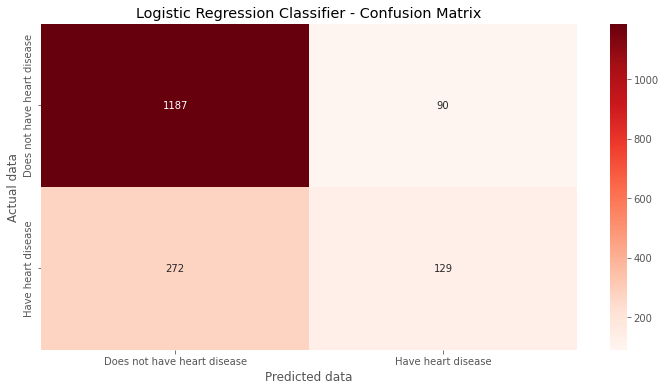

In [77]:
import seaborn as sns
output_labels=['Does not have heart disease','Have heart disease']
cm = confusion_matrix(actual,predicted)
#print(cm)
cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
plt.figure(figsize=(12,6))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='',xticklabels=output_labels,yticklabels = output_labels)
plt.xlabel("Predicted data")
plt.ylabel("Actual data")
plt.title('Logistic Regression Classifier - Confusion Matrix')
plt.show()

### 2. Random forest

#### Model training

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 20, 50, 100, 200]
for i in estimators:
    RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    RF.fit(X_train,training_scores_encoded)
    y_pred_rf = RF.predict(X_test)
    rf_scores.append(round(accuracy_score(y_pred_rf,testing_scores_encoded)*100,2))

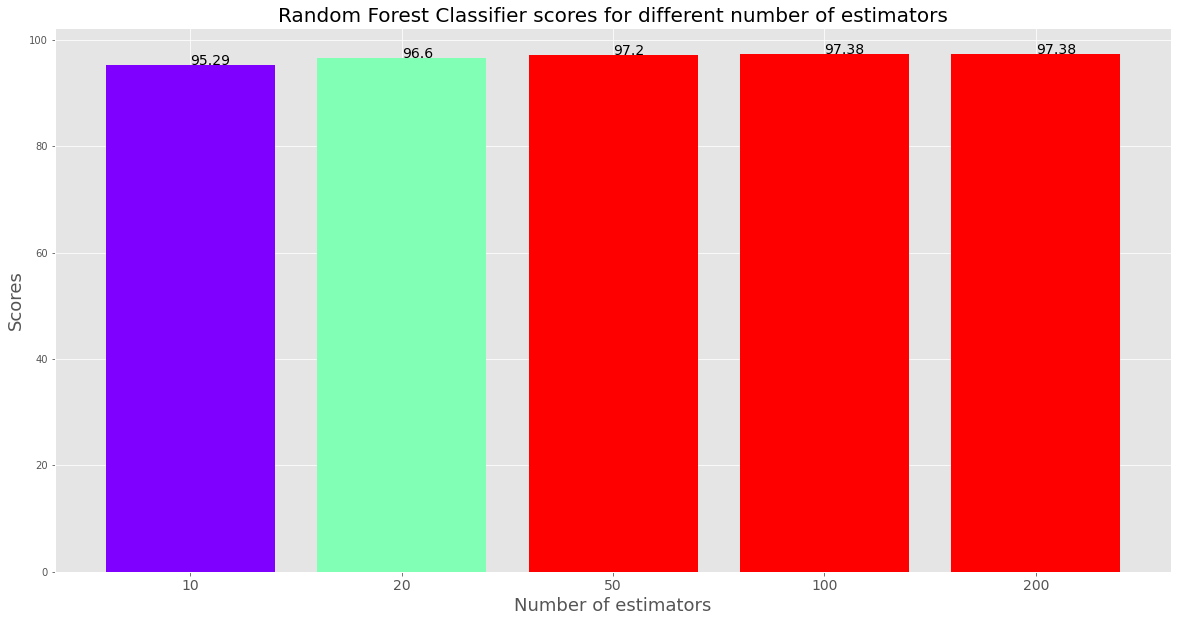

In [79]:
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 2, len(estimators)))
plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):    
    plt.text(i, rf_scores[i], rf_scores[i],fontsize = 14)
    plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators],fontsize = 14)
    plt.xlabel('Number of estimators',fontsize = 18)
    plt.ylabel('Scores',fontsize = 18)
    plt.title('Random Forest Classifier scores for different number of estimators',fontsize = 20)

#### Classification Report

In [80]:
print_score(RF, X_train,training_scores_encoded , X_test, testing_scores_encoded, train=True)
print_score(RF, X_train, training_scores_encoded , X_test, testing_scores_encoded, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5098.0  1610.0       1.0     6708.0        6708.0
_______________________________________________
Confusion Matrix: 
 [[5098    0]
 [   0 1610]]

Test Result:
Accuracy Score: 97.38%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.969535    0.989041  0.973778     0.979288      0.974197
recall        0.996868    0.900249  0.973778     0.948559      0.973778
f1-score      0.983012    0.942559  0.973778     0.962785      0.973344
support    1277.000000  401.000000  0.973778  1678.000000   1678.000000
_______________________

#### Accuracy

In [81]:
p2 = round(accuracy_score(y_pred_rf,testing_scores_encoded)*100,2)
print("Predicted accuracy using Random forest model : ",p2,"%")

Predicted accuracy using Random forest model :  97.38 %


#### Confusion Matrix

In [82]:
actual = testing_scores_encoded 
predicted = RF.predict(X_test)

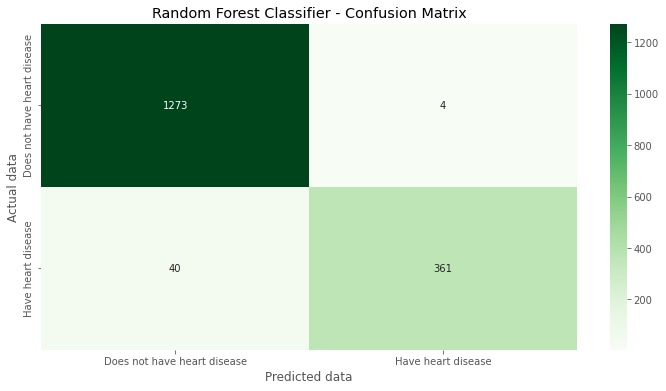

In [83]:
import seaborn as sns
output_labels=['Does not have heart disease','Have heart disease']
cm = confusion_matrix(actual,predicted)
#print(cm)
cm = pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
plt.figure(figsize=(12,6))
sns.heatmap(cm,cmap='Greens',annot=True,fmt='',xticklabels=output_labels,yticklabels = output_labels)
plt.xlabel("Predicted data")
plt.ylabel("Actual data")
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

### 3. Naive Bayes

#### Model training

In [84]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,training_scores_encoded)
y_pred_nb = GB.predict(X_test)

#### Classification Report

In [85]:
print_score(LR, X_train,training_scores_encoded , X_test, testing_scores_encoded, train = True)
print_score(LR, X_train, training_scores_encoded , X_test, testing_scores_encoded, train = False)

Train Result:
Accuracy Score: 78.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.811442     0.620000  0.788611     0.715721      0.765494
recall        0.940369     0.308075  0.788611     0.624222      0.788611
f1-score      0.871161     0.411618  0.788611     0.641390      0.760865
support    5098.000000  1610.000000  0.788611  6708.000000   6708.000000
_______________________________________________
Confusion Matrix: 
 [[4794  304]
 [1114  496]]

Test Result:
Accuracy Score: 78.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.813571    0.589041  0.784267     0.701306      0.759914
recall        0.929522    0.321696  0.784267     0.625609      0.784267
f1-score      0.867690    0.416129  0.784267     0.641910      0.759778
support    1277.000000  401.000000  

#### Accuracy

In [86]:
p3 = round(accuracy_score(y_pred_nb,testing_scores_encoded)*100,2)
print("Predicted accuracy using Naive Bayes model : ",p3,"%")

Predicted accuracy using Naive Bayes model :  76.34 %


#### Confusion Matrix

In [87]:
actual = testing_scores_encoded 
predicted = GB.predict(X_test)

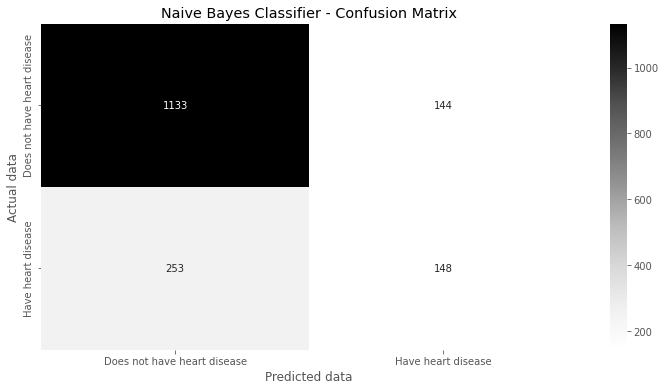

In [88]:
import seaborn as sns
output_labels=['Does not have heart disease','Have heart disease']
cm = confusion_matrix(actual,predicted)
#print(cm)
cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
plt.figure(figsize=(12,6))
sns.heatmap(cm,cmap='Greys',annot=True,fmt='',xticklabels=output_labels,yticklabels = output_labels)
plt.xlabel("Predicted data")
plt.ylabel("Actual data")
plt.title('Naive Bayes Classifier - Confusion Matrix')
plt.show()

### 4. Decision Tree

#### Model training

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,training_scores_encoded )
y_pred_dt = DT.predict(X_test)

#### Classification Report

In [90]:
print_score(DT, X_train,training_scores_encoded , X_test, testing_scores_encoded, train=True)
print_score(DT, X_train, training_scores_encoded , X_test, testing_scores_encoded, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5098.0  1610.0       1.0     6708.0        6708.0
_______________________________________________
Confusion Matrix: 
 [[5098    0]
 [   0 1610]]

Test Result:
Accuracy Score: 96.31%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.976471    0.920596  0.963051     0.948533      0.963118
recall        0.974941    0.925187  0.963051     0.950064      0.963051
f1-score      0.975705    0.922886  0.963051     0.949295      0.963083
support    1277.000000  401.000000  0.963051  1678.000000   1678.000000
_______________________

#### Accuracy

In [91]:
p4 = round(accuracy_score(y_pred_dt,testing_scores_encoded)*100,2)
print("Predicted accuracy using Decision Tree model : ",p4,"%")

Predicted accuracy using Decision Tree model :  96.31 %


#### Confusion Matrix

In [92]:
actual = testing_scores_encoded 
predicted = DT.predict(X_test)

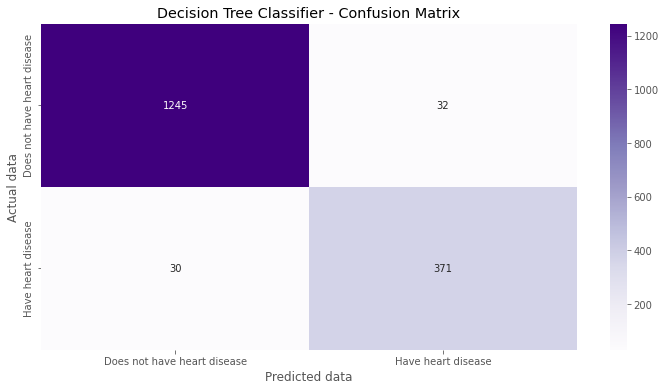

In [93]:
import seaborn as sns
output_labels=['Does not have heart disease','Have heart disease']
cm = confusion_matrix(actual,predicted)
#print(cm)
cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
plt.figure(figsize=(12,6))
sns.heatmap(cm,cmap='Purples',annot=True,fmt='',xticklabels=output_labels,yticklabels = output_labels)
plt.xlabel("Predicted data")
plt.ylabel("Actual data")
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.show()

### 5. Artificial neural Network

#### Model training

In [94]:
from keras.models import Sequential
from keras.layers import Dense 
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 15))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
model.fit(X_train,training_scores_encoded,epochs = 10)

Epoch 1/10
210/210 [==============================] - 1s 2ms/step - loss: 0.7478 - accuracy: 0.5441
Epoch 2/10
210/210 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7466
Epoch 3/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7788
Epoch 4/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8028
Epoch 5/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8135
Epoch 6/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8424
Epoch 7/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8465
Epoch 8/10
210/210 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8536
Epoch 9/10
210/210 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8517
Epoch 10/10
210/210 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8521

In [96]:
Y_pred_nn = model.predict(X_test)

In [97]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

#### Accuracy

In [98]:
p5 = round(accuracy_score(Y_pred_nn,testing_scores_encoded)*100,2)

print("Predicted accuracy using Artificial neural network model : ",p5,"%")

Predicted accuracy using Artificial neural network model :  85.88 %


## Model Performance Evaluation

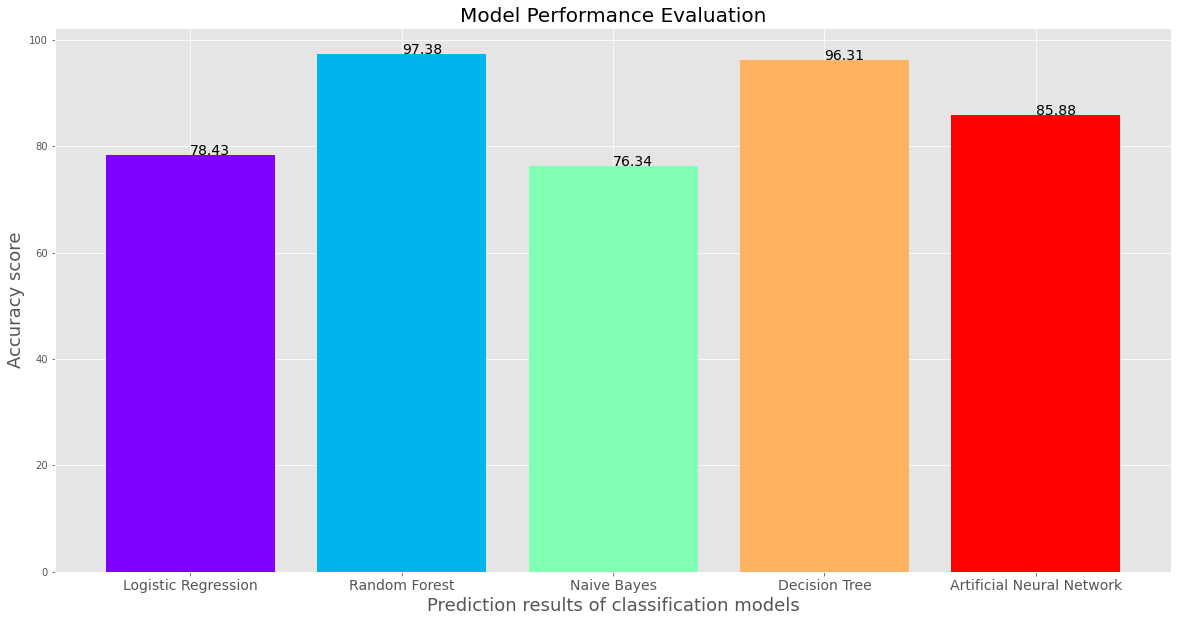

In [99]:
scores = [p1,p2,p3,p4,p5]
algorithms = ["Logistic Regression","Random Forest","Naive Bayes","Decision Tree","Artificial Neural Network"] 
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, len(algorithms)))
plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(estimators))], scores, color = colors, width = 0.8)

for i in range(len(estimators)):  
    plt.text(i, scores[i],scores[i],fontsize = 14)
    plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(algorithm) for algorithm in algorithms],fontsize = 14)
    plt.xlabel("Prediction results of classification models",fontsize = 18)
    plt.ylabel("Accuracy score",fontsize = 18)
    plt.title('Model Performance Evaluation',fontsize = 20)

## Saving trained model using pickle 

In [100]:
import pickle
with open("heart_model.pickle","wb") as g:
    pickle.dump(RF,g,protocol=2)